# Speech Recognition with DeepSpeech

This notebook uses an open source project [mozilla/DeepSpeech](https://github.com/mozilla/DeepSpeech) to transcribe a given youtube video.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install DeepSpeech

In [0]:
#@title
import os
from os.path import exists, join, basename, splitext

if not exists('deepspeech-0.6.1-models'):
  !apt-get install -qq sox
  !pip install -q deepspeech-gpu==0.6.1 youtube-dl
  !wget https://github.com/mozilla/DeepSpeech/releases/download/v0.6.1/deepspeech-0.6.1-models.tar.gz
  !tar xvfz deepspeech-0.6.1-models.tar.gz
  
from IPython.display import YouTubeVideo

## Transcribe Youtube Video

We are going to make speech recognition on the following youtube video:

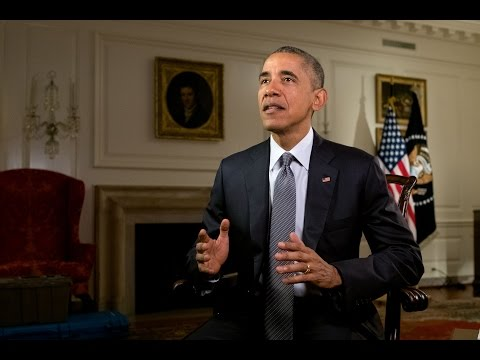

In [2]:
YOUTUBE_ID = '2AFpAATHXtc'


YouTubeVideo(YOUTUBE_ID)

Download the above video, convert to a WAV file and do speech recognition:

In [3]:
!rm -rf *.wav
!youtube-dl --extract-audio --audio-format wav --output "test.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}
!deepspeech --model deepspeech-0.6.1-models/output_graph.pbmm --lm deepspeech-0.6.1-models/lm.binary --trie deepspeech-0.6.1-models/trie --audio test.wav

[youtube] 2AFpAATHXtc: Downloading webpage
[youtube] 2AFpAATHXtc: Downloading video info webpage
[download] Destination: test.m4a
[download] 100% of 2.68MiB in 00:00
[ffmpeg] Correcting container in "test.m4a"
[ffmpeg] Destination: test.wav
Deleting original file test.m4a (pass -k to keep)
Loading model from file deepspeech-0.6.1-models/output_graph.pbmm
TensorFlow: v1.14.0-21-ge77504a
DeepSpeech: v0.6.1-0-g3df20fe
2020-02-11 16:05:38.108255: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-02-11 16:05:38.109492: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2020-02-11 16:05:38.164070: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-02-11 16:05:38.164611: I tensorflow/core